<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/dft_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
* play with digital Fourier transforms to build intuition
* see 27 May 2021 meeting https://github.com/geoffwoollard/learn_cryoem_math/blob/master/cryoem-group-study-meeting/meeting.pdf


In [2]:
!pip install pyfftw

     |████████████████████████████████| 2.6MB 5.3MB/s 


In [3]:
!wget https://raw.githubusercontent.com/geoffwoollard/learn_cryoem_math/4eb903a7c7db0d3af3edd1669f875061302c1c3d/src/fourier.py
import fourier

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def doplt(arr_2d): return plt.imshow(arr_2d,cmap='gray')

In [22]:
psize=1
N = 8
x = np.arange(-N//2,N//2,psize)


DC component

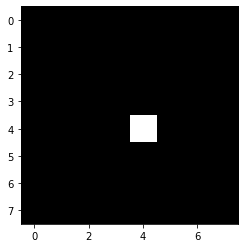

In [23]:
image_r = np.zeros((N,N))
image_r[N//2,N//2] = 1
doplt(image_r)

image_f = fourier.do_fft(image_r.reshape(1,N,N)).reshape(N,N)

In [24]:
image_f

array([[0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j,
        0.125-0.j, 0.125+0.j],
       [0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j,
        0.125+0.j, 0.125-0.j],
       [0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j,
        0.125-0.j, 0.125+0.j],
       [0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j,
        0.125+0.j, 0.125-0.j],
       [0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j,
        0.125-0.j, 0.125+0.j],
       [0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j,
        0.125+0.j, 0.125-0.j],
       [0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j,
        0.125-0.j, 0.125+0.j],
       [0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j, 0.125+0.j, 0.125-0.j,
        0.125+0.j, 0.125-0.j]])

1st component
* what happens with big/small N?

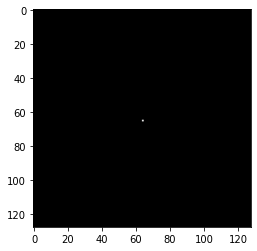

In [41]:
N=128
image_r = np.zeros((N,N))
image_r[N//2+1,N//2] = 1
doplt(image_r)

image_f = fourier.do_fft(image_r.reshape(1,N,N)).reshape(N,N)

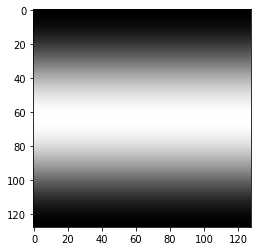

In [42]:
doplt(image_f.real)

Phase shift
* Let's see how a translation of an image is a global multaplicative constant to every Fourier pixel in Fourier space.

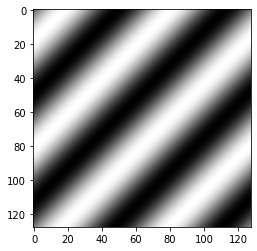

In [51]:
coords_1d = np.arange(-N//2,N//2)
xv, yv = np.meshgrid(coords_1d, coords_1d)
image_r = np.sin((xv + yv)/10)
doplt(image_r)

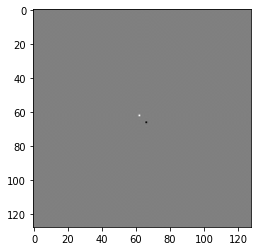

In [53]:
image_f = fourier.do_fft(image_r.reshape(1,N,N)).reshape(N,N)
doplt(image_f.imag)

We see the Fourier pixels are in the direction of the crest of the wave.

We translate this wave with a phase angle

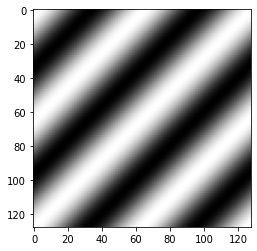

In [58]:
coords_1d = np.arange(-N//2,N//2)
xv, yv = np.meshgrid(coords_1d, coords_1d)
phase_angle = np.deg2rad(90)
image_shift_r = np.sin((xv + yv)/10 + phase_angle)
doplt(image_r)

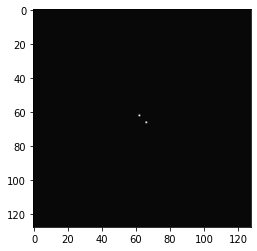

In [59]:
image_shift_f = fourier.do_fft(image_shift_r.reshape(1,N,N)).reshape(N,N)
doplt(image_shift_f.real)

The Fourier pixels are in the same area, but the values inside of them are now different.

We can shift the image in real space, by multiplying every pixel by the same global phase shift factor. This adds a constant into the (complex) angle of each Fourier component

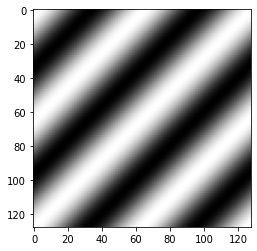

In [62]:
image_f_phaseshift = image_f * np.exp(+1j*np.deg2rad(45))
image_phaseshift_r = fourier.do_ifft(image_f_phaseshift.reshape(1,N,N)).reshape(N,N)
doplt(image_phaseshift_r.real)